In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Application_Train

In [2]:
df_train = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\application_train.csv")

In [3]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
x = missing_values_table(df_train)
x

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [6]:
x_train_modify = x[x['% of Total Values']< 30]
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [7]:
x_train_modify

,Missing Values,% of Total Values
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [8]:
x_train_modify.iloc[:,0]

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
Name: Missing Values, dtype: int64

In [9]:
type(x_train_modify)

pandas.core.frame.DataFrame

In [10]:
df_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

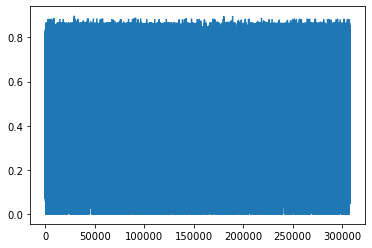

In [11]:
df_train['EXT_SOURCE_3'].plot()

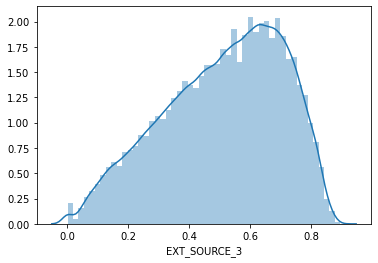

In [12]:
sns.distplot(df_train['EXT_SOURCE_3'])

In [13]:
df_train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [14]:
df_train['EXT_SOURCE_3'].median()

0.5352762504724826

In [15]:
df_train[('EXT_SOURCE_3_impute')] = df_train['EXT_SOURCE_3'].fillna(df_train['EXT_SOURCE_3'].median())

In [16]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [17]:
df_train.drop(['EXT_SOURCE_3'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.218859
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.661024


In [18]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276


In [19]:
## Imputation

In [20]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_WEEK_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0])

In [21]:
df_train.drop(['AMT_REQ_CREDIT_BUREAU_WEEK'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0


In [22]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.535276,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0


In [23]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_DAY_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0])

In [24]:
df_train.head()
df_train.drop(['AMT_REQ_CREDIT_BUREAU_DAY'], axis=1 )

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,1.0,0.0,1.0,0.0,1.0,0.218859,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.661024,0.0,0.0


In [25]:
#sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'])
#df_train[['AMT_REQ_CREDIT_BUREAU_WEEK_impute']] = df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
df_train[('AMT_REQ_CREDIT_BUREAU_MON_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

In [26]:
df_train[('AMT_REQ_CREDIT_BUREAU_QRT_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0])

In [27]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0


In [28]:
df_train[('AMT_REQ_CREDIT_BUREAU_HOUR_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0


In [29]:
df_train[('AMT_REQ_CREDIT_BUREAU_YEAR_impute')] = df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0


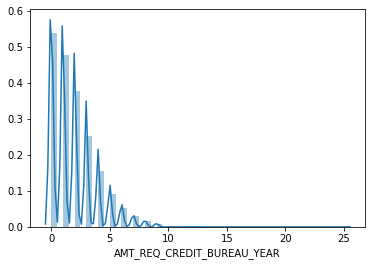

In [30]:
sns.distplot(df_train['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [31]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,1.0,0.218859,0.0,0.0,1.0,0.0,1.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_train.drop(['EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_MON' ], axis = 1, inplace=True) 
df_train.drop(['AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_YEAR' ], axis = 1, inplace=True) 

In [33]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0.218859,0.0,0.0,1.0,0.0,1.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.661024,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_train[('NAME_TYPE_SUITE_impute')] = df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0])
df_train.head()
	

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied


In [35]:
df_train[('DEF_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_21,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0


In [36]:
df_train[('OBS_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,EXT_SOURCE_3_impute,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.535276,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0


In [37]:
df_train[('DEF_60_CNT_SOCIAL_CIRCLE_impute')] = df_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_WEEK_impute,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0


In [38]:
df_train[('OBS_30_CNT_SOCIAL_CIRCLE_impute')] = df_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY_impute,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0


In [39]:
df_train[('EXT_SOURCE_2_impute')] = df_train['EXT_SOURCE_2'].fillna(df_train['EXT_SOURCE_2'].median())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_MON_impute,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738


In [40]:
df_train[('AMT_GOODS_PRICE_impute')] = df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].mean())
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0


In [41]:
df_train.drop(['NAME_TYPE_SUITE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','AMT_GOODS_PRICE'], axis = 1, inplace=True)

In [42]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.681632,225000.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.115992,225000.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.0,1.0,1.0,Unaccompanied,0.0,6.0,0.0,6.0,0.535722,585000.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.514163,319500.0


In [43]:
x = missing_values_table(df_train)
x

Your selected dataframe has 122 columns.
There are 53 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [44]:
index = x.index
a_list = list(index)
print(a_list)

['COMMONAREA_MEDI', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE

In [45]:
df_train.drop(df_train[a_list],axis=1,inplace=True)

In [46]:
x = missing_values_table(df_train)
x

Your selected dataframe has 69 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [47]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,AMT_REQ_CREDIT_BUREAU_QRT_impute,AMT_REQ_CREDIT_BUREAU_HOUR_impute,AMT_REQ_CREDIT_BUREAU_YEAR_impute,NAME_TYPE_SUITE_impute,DEF_30_CNT_SOCIAL_CIRCLE_impute,OBS_60_CNT_SOCIAL_CIRCLE_impute,DEF_60_CNT_SOCIAL_CIRCLE_impute,OBS_30_CNT_SOCIAL_CIRCLE_impute,EXT_SOURCE_2_impute,AMT_GOODS_PRICE_impute
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0.0,0.0,1.0,Unaccompanied,2.0,2.0,2.0,2.0,0.262949,351000.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0.0,0.0,0.0,Family,0.0,1.0,0.0,1.0,0.622246,1129500.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.555912,135000.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0.0,0.0,0.0,Unaccompanied,0.0,2.0,0.0,2.0,0.650442,297000.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.322738,513000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.681632,225000.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.115992,225000.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0.0,1.0,1.0,Unaccompanied,0.0,6.0,0.0,6.0,0.535722,585000.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0.0,0.0,0.0,Unaccompanied,0.0,0.0,0.0,0.0,0.514163,319500.0


# Bureau and Bureau Balance

In [52]:
bureau = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\bureau.csv")
bureau_balance = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\bureau_balance.csv")

In [54]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [55]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [56]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [57]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [58]:
bureau_balance.shape

(27299925, 3)

In [59]:
bureau.shape

(1716428, 17)

In [60]:
bureau_balance.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [61]:
percent_missing_bb = (bureau_balance.isnull().sum()/len(bureau_balance)) *100

In [62]:
percent_missing_bu = (bureau.isnull().sum()/len(bureau)) *100

In [63]:
percent_missing_bb

SK_ID_BUREAU      0.0
MONTHS_BALANCE    0.0
STATUS            0.0
dtype: float64

In [64]:
percent_missing_bu

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149573
DAYS_ENDDATE_FACT         36.916958
AMT_CREDIT_MAX_OVERDUE    65.513264
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011932
AMT_CREDIT_SUM_LIMIT      34.477415
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473490
dtype: float64

In [65]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [66]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [67]:
x = missing_values_table(bureau)
x

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5
AMT_CREDIT_MAX_OVERDUE,1124488,65.5
DAYS_ENDDATE_FACT,633653,36.9
AMT_CREDIT_SUM_LIMIT,591780,34.5
AMT_CREDIT_SUM_DEBT,257669,15.0
DAYS_CREDIT_ENDDATE,105553,6.1
AMT_CREDIT_SUM,13,0.0


In [68]:
bureau_modify = x[x['% of Total Values'] < 70]

In [69]:
bureau_modify.iloc[:,0]

AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
Name: Missing Values, dtype: int64

In [70]:
type(bureau_modify)

pandas.core.frame.DataFrame

In [71]:
bureau['AMT_CREDIT_SUM_DEBT']

0               0.0
1          171342.0
2               NaN
3               NaN
4               NaN
             ...   
1716423     11250.0
1716424         0.0
1716425         NaN
1716426         0.0
1716427         0.0
Name: AMT_CREDIT_SUM_DEBT, Length: 1716428, dtype: float64

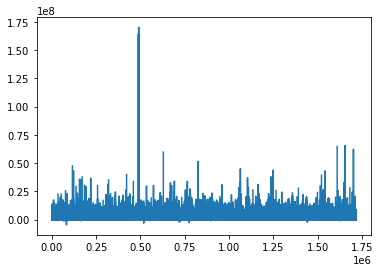

In [72]:
bureau['AMT_CREDIT_SUM_DEBT'].plot()

In [73]:
bureau['AMT_CREDIT_SUM_DEBT'].mean()

137085.11995216075

In [74]:
bureau[('AMT_CREDIT_SUM_DEBT_impute')] = bureau['AMT_CREDIT_SUM_DEBT'].fillna(bureau['AMT_CREDIT_SUM_DEBT'].mean())

In [75]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_SUM_DEBT_impute
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0.000000
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,171342.000000
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,137085.119952
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,137085.119952
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,137085.119952


In [76]:
bureau.drop(['AMT_CREDIT_SUM_DEBT'], axis=1, inplace=True)

In [77]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_SUM_DEBT_impute
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,NaN,0.0,Consumer credit,-131,NaN,0.000000
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,NaN,0.0,Credit card,-20,NaN,171342.000000
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,0.0,Consumer credit,-16,NaN,137085.119952
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,0.0,Credit card,-16,NaN,137085.119952
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,0.0,Consumer credit,-21,NaN,137085.119952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,0.0,0.0,Microloan,-19,NaN,11250.000000
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,Consumer credit,-2493,NaN,0.000000
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,0.0,Consumer credit,-967,NaN,137085.119952
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,Consumer credit,-1508,NaN,0.000000


In [78]:
bureau_modify.iloc[:,0]

AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
Name: Missing Values, dtype: int64

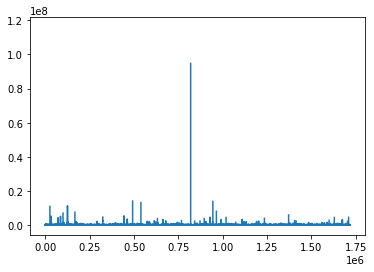

In [79]:
bureau['AMT_CREDIT_MAX_OVERDUE'].plot()

In [80]:
bureau[('AMT_CREDIT_MAX_OVERDUE_impute')] = bureau['AMT_CREDIT_MAX_OVERDUE'].fillna(bureau['AMT_CREDIT_MAX_OVERDUE'].mean())


In [81]:
bureau.drop(['AMT_CREDIT_MAX_OVERDUE'], axis=1,inplace=True)

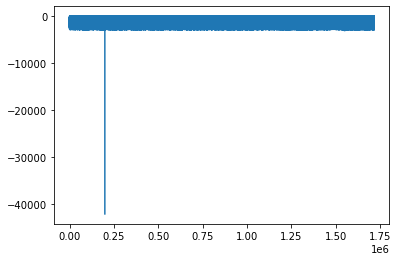

In [82]:
bureau['DAYS_ENDDATE_FACT'].plot()

In [83]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,AMT_CREDIT_SUM_DEBT_impute,AMT_CREDIT_MAX_OVERDUE_impute
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,0,91323.0,NaN,0.0,Consumer credit,-131,NaN,0.000000,3825.417661
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,0,225000.0,NaN,0.0,Credit card,-20,NaN,171342.000000,3825.417661
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,0,464323.5,NaN,0.0,Consumer credit,-16,NaN,137085.119952,3825.417661
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,0,90000.0,NaN,0.0,Credit card,-16,NaN,137085.119952,3825.417661
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,0,2700000.0,NaN,0.0,Consumer credit,-21,NaN,137085.119952,77674.500000


In [84]:
bureau[('AMT_CREDIT_SUM_LIMIT_impute')] = bureau['AMT_CREDIT_SUM_LIMIT'].fillna(bureau['AMT_CREDIT_SUM_LIMIT'].mean())
bureau.drop(['AMT_CREDIT_SUM_LIMIT'], axis=1, inplace = True)

In [85]:
bureau_modify.iloc[:,0]

AMT_CREDIT_MAX_OVERDUE    1124488
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_DEBT        257669
DAYS_CREDIT_ENDDATE        105553
AMT_CREDIT_SUM                 13
Name: Missing Values, dtype: int64

In [86]:
bureau[('AMT_CREDIT_SUM_impute')] = bureau['AMT_CREDIT_SUM'].fillna(bureau['AMT_CREDIT_SUM'].mean())
bureau.drop(['AMT_CREDIT_SUM'], axis=1, inplace = True)

In [87]:
bureau[('DAYS_CREDIT_ENDDATE_impute')] = bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].mean())
bureau.drop(['DAYS_CREDIT_ENDDATE'], axis=1, inplace = True)

In [88]:
bureau_modify123 = x[x['% of Total Values'] > 70]

In [89]:
bureau_modify123

,Missing Values,% of Total Values
AMT_ANNUITY,1226791,71.5


In [90]:
bureau.drop(['AMT_ANNUITY'], axis=1, inplace=True)

In [91]:
bureau.drop(['DAYS_ENDDATE_FACT'], axis=1, inplace=True)

In [92]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_CREDIT_SUM_DEBT_impute,AMT_CREDIT_MAX_OVERDUE_impute,AMT_CREDIT_SUM_LIMIT_impute,AMT_CREDIT_SUM_impute,DAYS_CREDIT_ENDDATE_impute
0,215354,5714462,Closed,currency 1,-497,0,0,0.0,Consumer credit,-131,0.000000,3825.417661,6229.51498,91323.00,-153.000000
1,215354,5714463,Active,currency 1,-208,0,0,0.0,Credit card,-20,171342.000000,3825.417661,6229.51498,225000.00,1075.000000
2,215354,5714464,Active,currency 1,-203,0,0,0.0,Consumer credit,-16,137085.119952,3825.417661,6229.51498,464323.50,528.000000
3,215354,5714465,Active,currency 1,-203,0,0,0.0,Credit card,-16,137085.119952,3825.417661,6229.51498,90000.00,510.517362
4,215354,5714466,Active,currency 1,-629,0,0,0.0,Consumer credit,-21,137085.119952,77674.500000,6229.51498,2700000.00,1197.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,0,0.0,Microloan,-19,11250.000000,0.000000,0.00000,11250.00,-30.000000
1716424,100044,5057754,Closed,currency 1,-2648,0,0,0.0,Consumer credit,-2493,0.000000,5476.500000,0.00000,38130.84,-2433.000000
1716425,100044,5057762,Closed,currency 1,-1809,0,0,0.0,Consumer credit,-967,137085.119952,3825.417661,6229.51498,15570.00,-1628.000000
1716426,246829,5057770,Closed,currency 1,-1878,0,0,0.0,Consumer credit,-1508,0.000000,3825.417661,0.00000,36000.00,-1513.000000


In [93]:
x = missing_values_table(bureau)
x

Your selected dataframe has 15 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [94]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_CREDIT_SUM_DEBT_impute,AMT_CREDIT_MAX_OVERDUE_impute,AMT_CREDIT_SUM_LIMIT_impute,AMT_CREDIT_SUM_impute,DAYS_CREDIT_ENDDATE_impute
0,215354,5714462,Closed,currency 1,-497,0,0,0.0,Consumer credit,-131,0.000000,3825.417661,6229.51498,91323.00,-153.000000
1,215354,5714463,Active,currency 1,-208,0,0,0.0,Credit card,-20,171342.000000,3825.417661,6229.51498,225000.00,1075.000000
2,215354,5714464,Active,currency 1,-203,0,0,0.0,Consumer credit,-16,137085.119952,3825.417661,6229.51498,464323.50,528.000000
3,215354,5714465,Active,currency 1,-203,0,0,0.0,Credit card,-16,137085.119952,3825.417661,6229.51498,90000.00,510.517362
4,215354,5714466,Active,currency 1,-629,0,0,0.0,Consumer credit,-21,137085.119952,77674.500000,6229.51498,2700000.00,1197.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,0,0.0,Microloan,-19,11250.000000,0.000000,0.00000,11250.00,-30.000000
1716424,100044,5057754,Closed,currency 1,-2648,0,0,0.0,Consumer credit,-2493,0.000000,5476.500000,0.00000,38130.84,-2433.000000
1716425,100044,5057762,Closed,currency 1,-1809,0,0,0.0,Consumer credit,-967,137085.119952,3825.417661,6229.51498,15570.00,-1628.000000
1716426,246829,5057770,Closed,currency 1,-1878,0,0,0.0,Consumer credit,-1508,0.000000,3825.417661,0.00000,36000.00,-1513.000000


In [95]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


# POS_CASH_balance

In [96]:
pos_cash = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\POS_CASH_balance.csv")

In [97]:
x = missing_values_table(pos_cash)
x

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [98]:
pos_cash_modify = x[x['% of Total Values']< 30]
pos_cash_modify

,Missing Values,% of Total Values
CNT_INSTALMENT_FUTURE,26087,0.3
CNT_INSTALMENT,26071,0.3


In [99]:
pos_cash_modify.iloc[:,0]

CNT_INSTALMENT_FUTURE    26087
CNT_INSTALMENT           26071
Name: Missing Values, dtype: int64

In [100]:
pos_cash[('CNT_INSTALMENT_FUTURE_impute')] = pos_cash['CNT_INSTALMENT_FUTURE'].fillna(pos_cash['CNT_INSTALMENT_FUTURE'].mean())

In [101]:
pos_cash[('CNT_INSTALMENT_impute')] = pos_cash['CNT_INSTALMENT'].fillna(pos_cash['CNT_INSTALMENT'].mean())

In [102]:
pos_cash.drop(pos_cash[['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT']], axis=1, inplace=True)

In [103]:
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_FUTURE_impute,CNT_INSTALMENT_impute
0,1803195,182943,-31,Active,0,0,45.0,48.0
1,1715348,367990,-33,Active,0,0,35.0,36.0
2,1784872,397406,-32,Active,0,0,9.0,12.0
3,1903291,269225,-35,Active,0,0,42.0,48.0
4,2341044,334279,-35,Active,0,0,35.0,36.0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,Active,843,0,0.0,6.0
10001354,1717234,141565,-19,Active,602,0,0.0,12.0
10001355,1283126,315695,-21,Active,609,0,0.0,10.0
10001356,1082516,450255,-22,Active,614,0,0.0,12.0


In [104]:
x = missing_values_table(pos_cash)
x

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [105]:
pos_cash

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,CNT_INSTALMENT_FUTURE_impute,CNT_INSTALMENT_impute
0,1803195,182943,-31,Active,0,0,45.0,48.0
1,1715348,367990,-33,Active,0,0,35.0,36.0
2,1784872,397406,-32,Active,0,0,9.0,12.0
3,1903291,269225,-35,Active,0,0,42.0,48.0
4,2341044,334279,-35,Active,0,0,35.0,36.0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,Active,843,0,0.0,6.0
10001354,1717234,141565,-19,Active,602,0,0.0,12.0
10001355,1283126,315695,-21,Active,609,0,0.0,10.0
10001356,1082516,450255,-22,Active,614,0,0.0,12.0


# credit_card_balance

In [107]:
cc_balance = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\credit_card_balance.csv")

In [108]:
x = missing_values_table(cc_balance)
x

Your selected dataframe has 23 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [109]:
x_train_modify = x[x['% of Total Values']< 30]
x_train_modify

,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


In [111]:
cc_balance[('AMT_PAYMENT_CURRENT_impute')] = cc_balance['AMT_PAYMENT_CURRENT'].fillna(cc_balance['AMT_PAYMENT_CURRENT'].mean())

In [112]:
cc_balance.drop(['AMT_PAYMENT_CURRENT'], axis=1, inplace=True)

In [113]:
cc_balance[('AMT_DRAWINGS_ATM_CURRENT_impute')] = cc_balance['AMT_DRAWINGS_ATM_CURRENT'].fillna(cc_balance['AMT_DRAWINGS_ATM_CURRENT'].mean())

In [114]:
cc_balance.drop(['AMT_DRAWINGS_ATM_CURRENT'], axis=1, inplace=True)

In [115]:
cc_balance[('AMT_DRAWINGS_OTHER_CURRENT_impute')] = cc_balance['AMT_DRAWINGS_OTHER_CURRENT'].fillna(cc_balance['AMT_DRAWINGS_OTHER_CURRENT'].mean())

In [116]:
cc_balance.drop(['AMT_DRAWINGS_OTHER_CURRENT'], axis=1, inplace=True)

In [ ]:
cc_balance[('AMT_DRAWINGS_POS_CURRENT_impute')] = cc_balance['AMT_DRAWINGS_POS_CURRENT'].fillna(cc_balance['AMT_DRAWINGS_POS_CURRENT'].mean())

In [117]:
cc_balance[('AMT_DRAWINGS_POS_CURRENT_impute')] = cc_balance['AMT_DRAWINGS_POS_CURRENT'].fillna(cc_balance['AMT_DRAWINGS_POS_CURRENT'].mean())

In [118]:
cc_balance.drop(['AMT_DRAWINGS_POS_CURRENT'], axis=1, inplace=True)

In [ ]:
cc_balance[('CNT_DRAWINGS_ATM_CURRENT_impute')] = cc_balance['CNT_DRAWINGS_ATM_CURRENT'].fillna(cc_balance['CNT_DRAWINGS_ATM_CURRENT'].mean())

In [119]:
cc_balance.drop(['CNT_DRAWINGS_ATM_CURRENT'], axis=1, inplace=True)

In [ ]:
cc_balance[('CNT_DRAWINGS_OTHER_CURRENT_impute')] = cc_balance['CNT_DRAWINGS_OTHER_CURRENT'].fillna(cc_balance['CNT_DRAWINGS_OTHER_CURRENT'].mean())

In [120]:
cc_balance.drop(['CNT_DRAWINGS_OTHER_CURRENT'], axis=1, inplace=True)

In [121]:
cc_balance[('CNT_DRAWINGS_POS_CURRENT_impute')] = cc_balance['CNT_DRAWINGS_POS_CURRENT'].fillna(cc_balance['CNT_DRAWINGS_POS_CURRENT'].mean())

In [122]:
cc_balance.drop(['CNT_DRAWINGS_POS_CURRENT'], axis=1, inplace=True)

In [123]:
cc_balance[('AMT_INST_MIN_REGULARITY_impute')] = cc_balance['AMT_INST_MIN_REGULARITY'].fillna(cc_balance['AMT_INST_MIN_REGULARITY'].mean())

In [124]:
cc_balance.drop(['AMT_INST_MIN_REGULARITY'], axis=1, inplace=True)

In [125]:
cc_balance[('CNT_INSTALMENT_MATURE_CUM_impute')] = cc_balance['CNT_INSTALMENT_MATURE_CUM'].fillna(cc_balance['CNT_INSTALMENT_MATURE_CUM'].mean())

In [126]:
cc_balance.drop(['CNT_INSTALMENT_MATURE_CUM'], axis=1, inplace=True)

In [127]:
x = missing_values_table(cc_balance)
x

Your selected dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [128]:
cc_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,...,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,AMT_PAYMENT_CURRENT_impute,AMT_DRAWINGS_ATM_CURRENT_impute,AMT_DRAWINGS_OTHER_CURRENT_impute,AMT_DRAWINGS_POS_CURRENT_impute,CNT_DRAWINGS_POS_CURRENT_impute,AMT_INST_MIN_REGULARITY_impute,CNT_INSTALMENT_MATURE_CUM_impute
0,2562384,378907,-6,56.970,135000,877.5,1800.000,0.000,0.000,0.000,...,Active,0,0,1800.000000,0.000000,0.000000,877.500000,1.000000,1700.325,35.0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.000,60175.080,64875.555,64875.555,...,Active,0,0,2250.000000,2250.000000,0.000000,0.000000,0.000000,2250.000,69.0
2,1740877,371185,-7,31815.225,450000,0.0,2250.000,26926.425,31460.085,31460.085,...,Active,0,0,2250.000000,0.000000,0.000000,0.000000,0.000000,2250.000,30.0
3,1389973,337855,-4,236572.110,225000,2250.0,11925.000,224949.285,233048.970,233048.970,...,Active,0,0,11925.000000,2250.000000,0.000000,0.000000,0.000000,11795.760,10.0
4,1891521,126868,-1,453919.455,450000,11547.0,27000.000,443044.395,453919.455,453919.455,...,Active,0,0,27000.000000,0.000000,0.000000,11547.000000,1.000000,22924.890,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,0.0,0.000,0.000,0.000,0.000,...,Active,0,0,10280.537702,5961.324822,288.169582,2968.804848,0.559479,0.000,0.0
3840308,1714892,347207,-9,0.000,45000,0.0,0.000,0.000,0.000,0.000,...,Active,0,0,1879.110000,0.000000,0.000000,0.000000,0.000000,0.000,23.0
3840309,1302323,215757,-9,275784.975,585000,270000.0,356994.675,269356.140,273093.975,273093.975,...,Active,0,0,375750.000000,270000.000000,0.000000,0.000000,0.000000,2250.000,18.0
3840310,1624872,430337,-10,0.000,450000,0.0,0.000,0.000,0.000,0.000,...,Active,0,0,10280.537702,5961.324822,288.169582,2968.804848,0.559479,0.000,0.0


# previous_application

In [129]:
df_app = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\previous_application.csv")

In [130]:
x = missing_values_table(df_app)
x

Your selected dataframe has 37 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [135]:
x_train_modify = x[x['% of Total Values']< 30]
x_train_modify

,Missing Values,% of Total Values
AMT_GOODS_PRICE,385515,23.1
AMT_ANNUITY,372235,22.3
CNT_PAYMENT,372230,22.3
PRODUCT_COMBINATION,346,0.0
AMT_CREDIT,1,0.0


In [136]:
df_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_impute
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,17145.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,607500.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,112500.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,450000.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,337500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,...,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0,267295.5
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,...,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0,87750.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,...,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0,105237.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,...,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0,180000.0


In [137]:
df_app[('AMT_GOODS_PRICE_impute')] = df_app['AMT_GOODS_PRICE'].fillna(df_app['AMT_GOODS_PRICE'].mean())
df_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_impute
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,17145.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,607500.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,112500.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,450000.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,337500.0


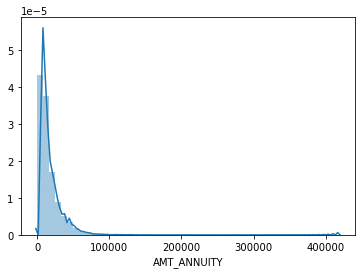

In [138]:
sns.distplot(df_app['AMT_ANNUITY'])

In [139]:
df_app[('AMT_ANNUITY_impute')] = df_app['AMT_ANNUITY'].fillna(df_app['AMT_ANNUITY'].mean())
df_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_impute,AMT_ANNUITY_impute
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,17145.0,1730.430
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,607500.0,25188.615
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,112500.0,15060.735
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,450000.0,47041.335
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395


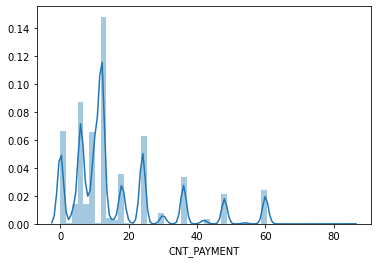

In [140]:
sns.distplot(df_app['CNT_PAYMENT'])

In [141]:
df_app[('CNT_PAYMENT_impute')] = df_app['CNT_PAYMENT'].fillna(df_app['CNT_PAYMENT'].mean())
df_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_impute,AMT_ANNUITY_impute,CNT_PAYMENT_impute
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,17145.0,1730.430,12.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,607500.0,25188.615,36.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0,112500.0,15060.735,12.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0,450000.0,47041.335,12.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN,337500.0,31924.395,24.0


In [142]:
df_app.drop(['AMT_GOODS_PRICE','CNT_PAYMENT','AMT_ANNUITY','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'], axis = 1, inplace=True)

In [143]:
df_app[('PRODUCT_COMBINATION_impute')] = df_app['PRODUCT_COMBINATION'].fillna(method='backfill')
df_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_GOODS_PRICE_impute,AMT_ANNUITY_impute,CNT_PAYMENT_impute,PRODUCT_COMBINATION_impute
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest,17145.0,1730.430,12.0,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,607500.0,25188.615,36.0,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,112500.0,15060.735,12.0,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,450000.0,47041.335,12.0,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,337500.0,31924.395,24.0,Cash Street: high


In [144]:
df_app[('AMT_CREDIT_impute')] = df_app['AMT_CREDIT'].fillna(df_app['AMT_CREDIT'].mean())
df_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,AMT_GOODS_PRICE_impute,AMT_ANNUITY_impute,CNT_PAYMENT_impute,PRODUCT_COMBINATION_impute,AMT_CREDIT_impute
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,Country-wide,35,Connectivity,middle,POS mobile with interest,17145.0,1730.430,12.0,POS mobile with interest,17145.0
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,Contact center,-1,XNA,low_action,Cash X-Sell: low,607500.0,25188.615,36.0,Cash X-Sell: low,679671.0
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,112500.0,15060.735,12.0,Cash X-Sell: high,136444.5
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,450000.0,47041.335,12.0,Cash X-Sell: middle,470790.0
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Credit and cash offices,-1,XNA,high,Cash Street: high,337500.0,31924.395,24.0,Cash Street: high,404055.0


In [145]:
df_app.drop(['PRODUCT_COMBINATION','AMT_CREDIT'], axis = 1, inplace=True)

In [146]:
x = missing_values_table(df_app)
x

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [147]:
df_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,AMT_GOODS_PRICE_impute,AMT_ANNUITY_impute,CNT_PAYMENT_impute,PRODUCT_COMBINATION_impute,AMT_CREDIT_impute
0,2030495,271877,Consumer loans,17145.0,SATURDAY,15,Y,1,XAP,Approved,...,XNA,Country-wide,35,Connectivity,middle,17145.0,1730.430,12.0,POS mobile with interest,17145.0
1,2802425,108129,Cash loans,607500.0,THURSDAY,11,Y,1,XNA,Approved,...,x-sell,Contact center,-1,XNA,low_action,607500.0,25188.615,36.0,Cash X-Sell: low,679671.0
2,2523466,122040,Cash loans,112500.0,TUESDAY,11,Y,1,XNA,Approved,...,x-sell,Credit and cash offices,-1,XNA,high,112500.0,15060.735,12.0,Cash X-Sell: high,136444.5
3,2819243,176158,Cash loans,450000.0,MONDAY,7,Y,1,XNA,Approved,...,x-sell,Credit and cash offices,-1,XNA,middle,450000.0,47041.335,12.0,Cash X-Sell: middle,470790.0
4,1784265,202054,Cash loans,337500.0,THURSDAY,9,Y,1,Repairs,Refused,...,walk-in,Credit and cash offices,-1,XNA,high,337500.0,31924.395,24.0,Cash Street: high,404055.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,...,XNA,Stone,43,Furniture,low_normal,267295.5,14704.290,30.0,POS industry with interest,311400.0
1670210,2357031,334635,Consumer loans,87750.0,TUESDAY,15,Y,1,XAP,Approved,...,XNA,Stone,43,Furniture,middle,87750.0,6622.020,12.0,POS industry with interest,64291.5
1670211,2659632,249544,Consumer loans,105237.0,MONDAY,12,Y,1,XAP,Approved,...,XNA,Country-wide,1370,Consumer electronics,low_normal,105237.0,11520.855,10.0,POS household with interest,102523.5
1670212,2785582,400317,Cash loans,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,...,x-sell,AP+ (Cash loan),-1,XNA,low_normal,180000.0,18821.520,12.0,Cash X-Sell: low,191880.0


# installments_payments

In [149]:
install = pd.read_csv("D:\\Data Science\\IAF Assignment Graded\\installments_payments.csv")

In [150]:
install.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [151]:
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [152]:
install.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [153]:
install.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

In [154]:
install.shape

(13605401, 8)

In [155]:
install.isnull().mean().sort_values(ascending = False)

AMT_PAYMENT               0.000214
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
DAYS_INSTALMENT           0.000000
NUM_INSTALMENT_NUMBER     0.000000
NUM_INSTALMENT_VERSION    0.000000
SK_ID_CURR                0.000000
SK_ID_PREV                0.000000
dtype: float64

In [156]:
install

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [157]:
#Dropping Column "Num_installment_version'

install.drop(['NUM_INSTALMENT_VERSION'], axis=1, inplace=True)

In [158]:
install.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,2,-1383.0,-1366.0,2165.040,2160.585


In [159]:
print(df_train, bureau, bureau_balance,pos_cash, cc_balance, df_app, install )

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0     

In [160]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# Merge Bureau and Bureau Balance

In [161]:
bereau_cats = _get_categorical_features(bureau)
bb_cats = _get_categorical_features(bureau_balance)

bureau = _get_dummies(bureau,bereau_cats)
bb = _get_dummies(bureau_balance,bb_cats)

In [165]:
bb_avg = bb.groupby('SK_ID_BUREAU').mean()

In [163]:
bureau = bureau.merge(right=bb_avg.reset_index(), how='left', on='SK_ID_BUREAU')

In [164]:
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,...,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,215354,5714462,Closed,currency 1,-497,0,0,0.0,Consumer credit,-131,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,0,0.0,Credit card,-20,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,0,0.0,Consumer credit,-16,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,0,0.0,Credit card,-16,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,0,0.0,Consumer credit,-21,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,0,0.0,Microloan,-19,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,0,0.0,Consumer credit,-2493,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,0,0.0,Consumer credit,-967,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,0,0.0,Consumer credit,-1508,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge Application_test and Bureau

In [166]:
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['buro_count'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['b_' + f_ for f_ in bureau_avg.columns]
df_train = df_train.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')

In [167]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,b_MONTHS_BALANCE,b_STATUS_0,b_STATUS_1,b_STATUS_2,b_STATUS_3,b_STATUS_4,b_STATUS_5,b_STATUS_C,b_STATUS_X,b_buro_count
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,-21.875000,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,-14.125000,0.404906,0.000000,0.0,0.0,0.0,0.0,0.459677,0.135417,4.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,-18.000000,0.216216,0.000000,0.0,0.0,0.0,0.0,0.783784,0.000000,1.0


# Merge Application_test and POS CASH

In [168]:
pos_cats = _get_categorical_features(pos_cash)
pos_cash = _get_dummies(pos_cash, pos_cats)

In [169]:
pos_count = pos_cash[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos_cash['SK_ID_PREV'] = pos_cash['SK_ID_CURR'].map(pos_count['SK_ID_PREV'])

## Average Values for all other variables in pos cash
pos_avg = pos_cash.groupby('SK_ID_CURR').mean()
pos_avg.columns = ['pos_' + f_ for f_ in pos_avg.columns]
df_train = df_train.merge(right=pos_avg.reset_index(), how='left', on='SK_ID_CURR')

In [170]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,pos_CNT_INSTALMENT_impute,pos_NAME_CONTRACT_STATUS_Active,pos_NAME_CONTRACT_STATUS_Amortized debt,pos_NAME_CONTRACT_STATUS_Approved,pos_NAME_CONTRACT_STATUS_Canceled,pos_NAME_CONTRACT_STATUS_Completed,pos_NAME_CONTRACT_STATUS_Demand,pos_NAME_CONTRACT_STATUS_Returned to the store,pos_NAME_CONTRACT_STATUS_Signed,pos_NAME_CONTRACT_STATUS_XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,24.000000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,10.107143,0.928571,0.0,0.0,0.0,0.071429,0.0,0.000000,0.000000,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,3.750000,0.750000,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,12.242364,0.857143,0.0,0.0,0.0,0.095238,0.0,0.047619,0.000000,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,15.333333,0.939394,0.0,0.0,0.0,0.045455,0.0,0.000000,0.015152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,8.898850,0.777778,0.0,0.0,0.0,0.111111,0.0,0.000000,0.111111,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,6.000000,0.857143,0.0,0.0,0.0,0.142857,0.0,0.000000,0.000000,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,6.705882,0.882353,0.0,0.0,0.0,0.117647,0.0,0.000000,0.000000,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,14.900000,1.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0


# Merge Application_test and credit_card_balance

In [171]:
ccbal_cats = _get_categorical_features(cc_balance)
cc_balance = _get_dummies(cc_balance, ccbal_cats)

In [172]:
### count the number of previous applications for a given ID
nb_prevs = cc_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
cc_balance['SK_ID_PREV'] = cc_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])

### average of all other columns 
avg_cc_bal = cc_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ for f_ in avg_cc_bal.columns]
df_train = df_train.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')

In [173]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,cc_bal_CNT_DRAWINGS_POS_CURRENT_impute,cc_bal_AMT_INST_MIN_REGULARITY_impute,cc_bal_CNT_INSTALMENT_MATURE_CUM_impute,cc_bal_NAME_CONTRACT_STATUS_Active,cc_bal_NAME_CONTRACT_STATUS_Approved,cc_bal_NAME_CONTRACT_STATUS_Completed,cc_bal_NAME_CONTRACT_STATUS_Demand,cc_bal_NAME_CONTRACT_STATUS_Refused,cc_bal_NAME_CONTRACT_STATUS_Sent proposal,cc_bal_NAME_CONTRACT_STATUS_Signed
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0.559479,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge Application_Train and Previous Application

In [174]:
prev_app_cats = _get_categorical_features(df_app)
prev = _get_dummies(df_app, prev_app_cats)

In [175]:
## count the number of previous applications for a given ID
prev_apps_count = prev[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev['SK_ID_PREV'] = prev['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])

## Average values for all other features in previous applications
prev_apps_avg = prev.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['p_' + col for col in prev_apps_avg.columns]
df_train = df_train.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')

In [176]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,p_PRODUCT_COMBINATION_impute_Cash X-Sell: low,p_PRODUCT_COMBINATION_impute_Cash X-Sell: middle,p_PRODUCT_COMBINATION_impute_POS household with interest,p_PRODUCT_COMBINATION_impute_POS household without interest,p_PRODUCT_COMBINATION_impute_POS industry with interest,p_PRODUCT_COMBINATION_impute_POS industry without interest,p_PRODUCT_COMBINATION_impute_POS mobile with interest,p_PRODUCT_COMBINATION_impute_POS mobile without interest,p_PRODUCT_COMBINATION_impute_POS other with interest,p_PRODUCT_COMBINATION_impute_POS others without interest
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0.333333,0.00,0.333333,0.0,0.333333,0.0,0.000000,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0.222222,0.00,0.111111,0.0,0.111111,0.0,0.000000,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0.000000,0.50,0.166667,0.0,0.000000,0.0,0.166667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0.000000,0.00,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0.000000,0.00,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0.000000,0.00,0.500000,0.0,0.000000,0.0,0.500000,0.0,0.0,0.0


# Merge Application_test and Installments payments

In [177]:
ins_cats = _get_categorical_features(install)
ins = _get_dummies(install, ins_cats)

In [178]:
## count the number of previous installments
cnt_inst = ins[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
ins['SK_ID_PREV'] = ins['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

## Average values for all other variables in installments payments
avg_inst = ins.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['i_' + f_ for f_ in avg_inst.columns]
df_train = df_train.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')

In [179]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,p_PRODUCT_COMBINATION_impute_POS mobile with interest,p_PRODUCT_COMBINATION_impute_POS mobile without interest,p_PRODUCT_COMBINATION_impute_POS other with interest,p_PRODUCT_COMBINATION_impute_POS others without interest,i_SK_ID_PREV,i_NUM_INSTALMENT_NUMBER,i_DAYS_INSTALMENT,i_DAYS_ENTRY_PAYMENT,i_AMT_INSTALMENT,i_AMT_PAYMENT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0.000000,0.0,1.0,0.0,19.0,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0.000000,0.0,0.0,0.0,25.0,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0.000000,1.0,0.0,0.0,3.0,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0.000000,0.0,0.0,0.0,16.0,4.437500,-252.250000,-271.625000,62947.088438,62947.088438
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0.166667,0.0,0.0,0.0,66.0,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,1.000000,0.0,0.0,0.0,7.0,4.000000,-120.000000,-156.285714,7492.924286,7492.924286
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0.000000,0.0,0.0,0.0,6.0,3.500000,-2391.000000,-2393.833333,10069.867500,10069.867500
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,1.000000,0.0,0.0,0.0,14.0,4.785714,-2372.928571,-2387.428571,4399.707857,4115.915357
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0.500000,0.0,0.0,0.0,19.0,5.263158,-142.263158,-161.263158,10239.832895,10239.832895


### EDA on "df_train" -Vamsi is on it

Calculating WOE and IV values to check power of predictors(weak,medium,strong,or useless)

if IV values are-
              <0.02 useless variable
              b/w 0.02 to 0.1 -weak predictor
              b/w 0.1 to 0.3- Medium predictor
              b/w 0.3 to 0.5- strong predictor
               >0.5 - too good to be true or suspicious

In [200]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df_train1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df_train1[['X','Y']][df_train1.X.isnull()]
    notmiss = df_train1[['X','Y']][df_train1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df_train1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df_train1[['X','Y']][df_train1.X.isnull()]
    notmiss = df_train1[['X','Y']][df_train1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df_train1, TARGET):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df_train1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df_train1[i], np.number) and len(Series.unique(df_train1[i])) > 2:
                conv = mono_bin(TARGET, df_train1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(TARGET, df_train1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df_train1 = conv
            else:
                iv_df_train1 = iv_df_train1.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df_train1.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df_train1,iv)

In [201]:
final_iv, IV = data_vars(df_train,df_train.TARGET)

In [202]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,SK_ID_CURR,100002,278202,153756,12541.0,0.081564,141215.0,0.918436,0.505176,0.499547,0.011205,0.000127
1,SK_ID_CURR,278203,456255,153755,12284.0,0.079893,141471.0,0.920107,0.494824,0.500453,-0.011312,0.000127
2,NAME_CONTRACT_TYPE,Cash loans,Cash loans,278232,23221.0,0.083459,255011.0,0.916541,0.935388,0.902100,0.036236,0.015039
3,NAME_CONTRACT_TYPE,Revolving loans,Revolving loans,29279,1604.0,0.054783,27675.0,0.945217,0.064612,0.097900,-0.415543,0.015039
4,CODE_GENDER,F,F,202448,14170.0,0.069993,188278.0,0.930007,0.570796,0.666032,-0.154307,0.038597
...,...,...,...,...,...,...,...,...,...,...,...,...
963,i_AMT_PAYMENT,12225.8,15718.6,36454,2764.0,0.075822,33690.0,0.924178,0.111339,0.119178,-0.068037,0.028883
964,i_AMT_PAYMENT,15718.7,21352.6,36454,2723.0,0.074697,33731.0,0.925303,0.109688,0.119323,-0.084198,0.028883
965,i_AMT_PAYMENT,21353.1,33260.5,36454,2613.0,0.071679,33841.0,0.928321,0.105257,0.119712,-0.128689,0.028883
966,i_AMT_PAYMENT,33260.8,2.50459e+06,36455,2549.0,0.069922,33906.0,0.930078,0.102679,0.119942,-0.155405,0.028883


In [204]:
IV_Values=IV.sort_values('IV')

In [237]:
IV_Values

,VAR_NAME,IV
42,FLAG_MOBIL,1.251389e-11
22,FLAG_DOCUMENT_12,5.005563e-11
20,FLAG_DOCUMENT_10,6.131869e-10
34,FLAG_DOCUMENT_4,7.821510e-09
3,AMT_REQ_CREDIT_BUREAU_DAY_impute,2.780785e-08
...,...,...
76,b_CREDIT_ACTIVE_Closed,8.720137e-02
100,b_DAYS_CREDIT_UPDATE,9.370376e-02
98,b_DAYS_CREDIT,1.214722e-01
18,EXT_SOURCE_3_impute,2.983691e-01


In [246]:
v = IV_Values[IV_Values['IV'] > 0.1]

In [247]:
v.shape

(3, 2)

In [248]:
print(v)

               VAR_NAME        IV
98        b_DAYS_CREDIT  0.121472
18  EXT_SOURCE_3_impute  0.298369
17  EXT_SOURCE_2_impute  0.318520
